In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Pandas display format
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [9]:
entry_df = pd.read_csv("/Users/lvk99/Jupyterfiles/2nd year PhD/Research/Eric drills/Data/drills_data/entry.csv")
prices_df = pd.read_csv("/Users/lvk99/Jupyterfiles/2nd year PhD/Research/Eric drills/Data/drills_data/prices.csv")

# Entry

In [18]:
# How many cities?
print(len(entry_df.city.unique()))

# How many states?
print(len(entry_df.state.unique()))

1417
54


In [81]:
entry_df.columns

Index(['HD', 'city', 'state', 'LO', 'city.1', 'state.1', 'address', 'city.2',
       'store', 'time', 'url', 'zipcode', 'STATE', 'STATENS', 'STATE_NAME',
       'STUSAB', 'NAME', 'population', 'under44_1', 'under44_2', 'under44_3',
       'older65_1', 'older_65_2', 'income_per_capita', 'industrial_managers',
       'construction_managers', 'farmers', 'realestate',
       'construction_workers', 'state:1', 'place'],
      dtype='object')

In [ ]:
# HD maybe number of home depot stores, LO equivalent for HD
# STATENS, maybe CENSUS identifier
# under44, number of people under age 44?
# older65, number of people over 65

In [112]:
entry_df.STATENS.unique()

array([1714934, 1779804, 1779801, 1779795, 1705317, 1102857, 1779799,
       1085497,  897535, 1779796, 1155107,  662849, 1779775, 1629543,
       1779803, 1779784, 1779778, 1779789, 1779798,  294478, 1455989,
       1785533, 1779785, 1325873, 1027616, 1779806, 1779791, 1779779,
        448508, 1779787,  606926, 1779777, 1779805,   68085, 1779808,
       1779802, 1779780,  767982, 1779790, 1779783, 1779786, 1779793,
       1779807, 1779794, 1779781, 1219835, 1779797,  481813, 1779792,
       1779782, 1802710, 1785534, 1802705, 1702382])

In [111]:
entry_df.HD.unique()

array([ 1,  2,  4,  3,  6,  7,  5, 11, 19,  9, 10,  8, 12])

In [109]:
# Place ids don't seem to be unique
# Place id == 100 offers an example, it refers to one location in Aberdeen and one in Absecon

entry_df[entry_df.place == 100.000]

,HD,city,state,LO,city.1,state.1,address,city.2,store,time,...,older65_1,older_65_2,income_per_capita,industrial_managers,construction_managers,farmers,realestate,construction_workers,state:1,place
1,1,Aberdeen,53,nan,NaN,nan,2213 Port Industrial Rd,Aberdeen,HD,1597100892.168,...,1506.000,1061.000,21544.000,nan,nan,nan,nan,nan,53.000,100.000
3,1,Absecon,34,nan,NaN,nan,421 Absecon Blvd,Absecon,HD,1597100547.438,...,1062.000,789.000,35991.000,nan,nan,nan,nan,nan,34.000,100.000


In [90]:
len(entry_df), len(entry_df.place.unique())

(1584, 1336)

In [91]:
entry_df.HD.unique()

array([ 1,  2,  4,  3,  6,  7,  5, 11, 19,  9, 10,  8, 12])

In [95]:
entry_df.under44_1

0        569.000
1       1377.000
2      19407.000
3        708.000
4       1963.000
          ...   
1579     910.000
1580   12169.000
1581    1429.000
1582     127.000
1583     210.000
Name: under44_1, Length: 1584, dtype: float64

In [108]:
# All null values

for col in entry_df.columns[-7:-2]:
    print(col)
    print(entry_df[col].unique())
    print('--------------')

industrial_managers
[nan]
--------------
construction_managers
[nan]
--------------
farmers
[nan]
--------------
realestate
[nan]
--------------
construction_workers
[nan]
--------------


In [101]:
print("Industrial managers")
entry_df.industrial_managers.unique(), entry_df.construction_managers.unique(), entry_df.farmers.unique()

(array([nan]), array([nan]), array([nan]))

In [97]:
entry_df[['address', 'city', 'state', 'population']].head(2)

,address,city,state,population
0,979 Beards Hill Road,Aberdeen,24,2723.000
1,2213 Port Industrial Rd,Aberdeen,53,16359.000


In [93]:
entry_df.head(2)

,HD,city,state,LO,city.1,state.1,address,city.2,store,time,...,older65_1,older_65_2,income_per_capita,industrial_managers,construction_managers,farmers,realestate,construction_workers,state:1,place
0,1,Aberdeen,24,nan,NaN,nan,979 Beards Hill Road,Aberdeen,HD,1597100429.521,...,18.000,9.000,28641.000,nan,nan,nan,nan,nan,24.000,175.000
1,1,Aberdeen,53,nan,NaN,nan,2213 Port Industrial Rd,Aberdeen,HD,1597100892.168,...,1506.000,1061.000,21544.000,nan,nan,nan,nan,nan,53.000,100.000


In [31]:
entry_df.store.unique()

array(['HD', 'LOW'], dtype=object)

In [30]:
entry_df[['city', 'state','population']]

,city,state,population
0,Aberdeen,24,2723.000
1,Aberdeen,53,16359.000
2,Abilene,48,123676.000
3,Absecon,34,8289.000
4,Acworth,13,22336.000
...,...,...,...
1579,Yulee,12,12616.000
1580,Yuma,4,95573.000
1581,Zachary,22,17056.000
1582,Zanesville,39,2253.000


In [27]:
entry_df.describe()

,HD,state,LO,state.1,time,STATE,STATENS,population,under44_1,under44_2,...,older65_1,older_65_2,income_per_capita,industrial_managers,construction_managers,farmers,realestate,construction_workers,state:1,place
count,1584.000,1584.000,633.000,633.000,1584.000,1584.000,1584.000,1449.000,1443.000,1443.000,...,1443.000,1443.000,1448.000,0.000,0.000,0.000,0.000,0.000,1449.000,1449.000
mean,1.254,27.140,1.273,28.051,1597122062.546,27.140,1503873.972,69471.618,7389.017,10960.044,...,5274.622,3868.283,-888759.182,nan,nan,nan,nan,nan,26.834,42784.767
std,0.995,16.300,0.817,16.531,33131.202,16.300,492406.700,146346.169,15760.372,26923.922,...,10172.375,7216.405,24769104.354,nan,nan,nan,nan,nan,16.378,24245.218
min,1.000,1.000,1.000,1.000,1597100286.471,1.000,68085.000,0.000,0.000,0.000,...,0.000,0.000,-666666666.000,nan,nan,nan,nan,nan,1.000,100.000
25%,1.000,12.000,1.000,12.000,1597100379.109,12.000,1423460.000,12909.000,1053.500,1680.500,...,1089.000,848.500,24346.250,nan,nan,nan,nan,nan,12.000,21796.000
50%,1.000,26.000,1.000,29.000,1597100605.555,26.000,1779779.000,30840.000,2869.000,4164.000,...,2502.000,1925.000,29674.000,nan,nan,nan,nan,nan,26.000,43930.000
75%,1.000,41.000,1.000,45.000,1597172338.610,41.000,1779796.000,73392.000,7011.000,10665.500,...,5736.000,4398.000,37083.000,nan,nan,nan,nan,nan,41.000,62546.000
max,19.000,78.000,10.000,56.000,1597173827.094,78.000,1802710.000,2718555.000,276678.000,536817.000,...,189225.000,137757.000,216416.000,nan,nan,nan,nan,nan,72.000,89140.000


---------
# Price dataframe

In [45]:
prices_df.columns

Index(['platform', 'website', 'date', 'zipcode', 'rank', 'page', 'query',
       'prod_id', 'upc', 'product', 'manufacturer', 'model', 'price',
       'list_price', 'in_stock', 'max_qty', 'seller', 'arrives', 'shipping',
       'shipping_price', 'shipping_options', 'store_stock', 'store_address',
       'store_zip', 'store_price', 'weight', 'reviews', 'rating', 'quantity1',
       'quantity2', 'quantity3', 'quantity4', 'quantity5', 'ads'],
      dtype='object')

In [120]:
prices_df['counter'] = prices_df.index

In [121]:
prices_df.groupby(['manufacturer', 'model'])['counter'].nunique()

manufacturer    model                                             
ACDelco         ARD12126S1                                            102
                ARD847 Li-Ion 8-volt Super Compact Drill/Driver Ki     26
Amazon Renewed  11255VSRRT                                             53
                2691-22-cr                                             25
                6335-02-cr                                              1
                                                                     ... 
Worx            WX176L.9                                               61
XtremepowerUS   61108-XP                                              145
                61108-XP1                                              15
                61109-XP                                               13
Yescom          08PDH005-PD52CC-02                                     26
Name: counter, Length: 409, dtype: int64

In [52]:
for col in prices_df.columns:
    print(col)
    
    if len(prices_df[col].unique()) <= 30:
        print(prices_df[col].unique())
    else:
        print("Many values")

    print("---------------------------------")

platform
['LOW' 'HD' 'WMT' 'AMZN']
---------------------------------
website
['https://www.lowes.com/' 'https://www.homedepot.com/'
 'https://www.walmart.com/' 'https://www.amazon.com/']
---------------------------------
date
Many values
---------------------------------
zipcode
[78722]
---------------------------------
rank
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20.  0. nan]
---------------------------------
page
[ 1. nan  2.  3.]
---------------------------------
query
Many values
---------------------------------
prod_id
Many values
---------------------------------
upc
Many values
---------------------------------
product
Many values
---------------------------------
manufacturer
Many values
---------------------------------
model
Many values
---------------------------------
price
Many values
---------------------------------
list_price
Many values
---------------------------------
in_stock
[ 1.  0. nan]
---------------------------------
max_

In [141]:
prices_df.reviews, prices_df.rating

(0        170.000
 1       1118.000
 2         15.000
 3        449.000
 4        254.000
           ...   
 20524     39.000
 20525        nan
 20526        nan
 20527    105.000
 20528        nan
 Name: reviews, Length: 20529, dtype: float64,
 0       4.818
 1       4.721
 2       4.533
 3       4.800
 4       4.882
          ... 
 20524   4.100
 20525     nan
 20526     nan
 20527   3.900
 20528     nan
 Name: rating, Length: 20529, dtype: float64)

In [142]:
# Can check Eric's GitHub for quantity definitions.

# Number of sellers for Amazon?
prices_df.quantity1.unique()

# Limited number of stock for Amazon?
prices_df.quantity3.unique()

array([2.0000e+00, 2.3000e+01, 0.0000e+00, 2.6000e+01, 6.0000e+00,
       1.0000e+00, 3.0000e+00,        nan, 1.1000e+01, 4.0000e+00,
       5.0000e+00, 1.0000e+01, 7.0000e+00, 1.6000e+01, 1.7000e+01,
       1.5000e+01, 8.0000e+00, 1.8000e+01, 3.1000e+01, 2.8560e+03,
       9.2200e+02, 5.7000e+02, 1.2600e+02, 2.9800e+02, 5.9000e+02,
       7.6000e+01, 4.7800e+02, 6.6000e+02, 2.7760e+03, 3.2000e+01,
       3.4000e+01, 4.5000e+01, 6.1700e+02, 4.7400e+02, 2.6900e+02,
       1.2900e+02, 1.7200e+02, 1.1900e+02, 2.8000e+01, 1.8900e+02,
       1.2000e+02, 2.0000e+01, 3.5000e+01, 1.4000e+01, 9.0000e+00,
       1.2000e+01, 3.6000e+01, 3.0000e+01, 4.4000e+01, 2.7000e+01,
       1.9000e+01, 2.8390e+03, 5.7600e+02, 6.3000e+01, 1.2100e+02,
       8.4880e+03, 1.7100e+02, 5.5000e+01, 2.2000e+01, 2.1000e+01,
       2.4000e+01, 2.9000e+01, 1.0000e+02, 5.0000e+01, 2.8310e+03,
       9.8300e+02, 5.6400e+02, 5.9200e+02, 6.5700e+02, 5.7500e+02,
       5.8000e+01, 4.7700e+02, 4.6000e+01, 8.4870e+03, 2.5800e

In [ ]:
# Ads. 1 means that it was sponsered, 0 means it wasn't promoted

In [ ]:
# No UPC on Amazon, hard to match these to Amazon IDs


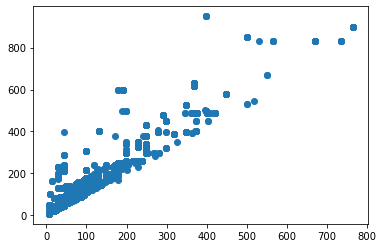

In [127]:
# Prices vs List Prices scatter

plt.scatter(prices_df.price, prices_df.list_price)
plt.show()

In [130]:
prices_df.columns

Index(['platform', 'website', 'date', 'zipcode', 'rank', 'page', 'query',
       'prod_id', 'upc', 'product', 'manufacturer', 'model', 'price',
       'list_price', 'in_stock', 'max_qty', 'seller', 'arrives', 'shipping',
       'shipping_price', 'shipping_options', 'store_stock', 'store_address',
       'store_zip', 'store_price', 'weight', 'reviews', 'rating', 'quantity1',
       'quantity2', 'quantity3', 'quantity4', 'quantity5', 'ads', 'counter'],
      dtype='object')

In [133]:
prices_df.groupby('platform')['max_qty'].mean(), prices_df.groupby('platform')['max_qty'].max()

(platform
 AMZN   19.692
 HD        nan
 LOW       nan
 WMT    11.682
 Name: max_qty, dtype: float64,
 platform
 AMZN   80.000
 HD        nan
 LOW       nan
 WMT    12.000
 Name: max_qty, dtype: float64)

In [138]:
prices_df['store_stock'].unique()

array([nan, 'Free ship to store for pickup',
       'Limited stock at Austin Mueller Airport',
       'Limited stock at nearby store', 'In stock', 'Limited stock',
       'Unknown', 'Out of stock', 'Unavailable at your store',
       'Limited stock at Se Austin'], dtype=object)

In [135]:
prices_df[prices_df['platform']=='AMZN'].seller.unique()

array(['Amazon.com', nan, 'MaxTool',
       '\n                                —\n                            ',
       'CPO Outlets', 'Baystate Tool Supply', 'TheHardwareSource',
       'SHANESHOP', 'JBTools', 'Neandertool', 'E-Com Supply',
       'Garland Home Center', 'TwinBargains', 'Amazon Warehouse',
       'Aplus Quality', 'ExpressUSA.', 'gifts4utlmglobal',
       'Sunbelt Products', 'Masterworkstool', 'KimoUS', 'KIMODirect',
       'Teccpo Power US', 'GreatStar Tools', 'dirtcheapsellerms',
       'Toolman-usa', 'Shop J&W', 'mantianxing-US', 'dollar-a-day',
       'AB Promise', '1sso', 'Vera Tools', 'dabojin', 'AMT Pro',
       'GALAX  PRO', 'Ferrigan Enterprises', 'Glory-PTL', 'Simple Works',
       'neatbuys', 'Acme Tools', '3S Distributing', 'Bomb Brands ✔',
       'Hardware Sales Inc.', 'Essex Technology Group', 'JaxPawnII',
       'Other Fellow', 'RLT-Source', 'Naturally Nature', 'by Holikme',
       'Hi-Spec Products, Inc.', 'Three Lovely Princesses', 'RFBDirect',
       '

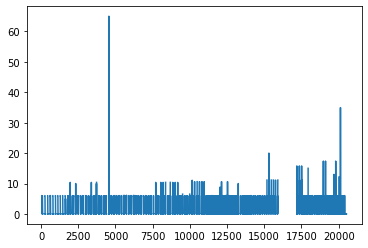

In [55]:
plt.plot(prices_df.shipping_price)
plt.show()

In [42]:
prices_df.platform.unique()

array(['LOW', 'HD', 'WMT', 'AMZN'], dtype=object)

In [58]:
prices_df.quantity1.head(4)

0    2.000
1   23.000
2    0.000
3   26.000
Name: quantity1, dtype: float64

In [59]:
prices_df.quantity2.head(4)

0   0.000
1   0.000
2   0.000
3   1.000
Name: quantity2, dtype: float64

In [60]:
prices_df.quantity3.head(4)

0   nan
1   nan
2   nan
3   nan
Name: quantity3, dtype: float64

In [61]:
prices_df.quantity4.head(4)

0   nan
1   nan
2   nan
3   nan
Name: quantity4, dtype: float64

In [62]:
prices_df.quantity5.head(4)

0   nan
1   nan
2   nan
3   nan
Name: quantity5, dtype: float64